In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json


In [57]:
df_jeop = pd.read_csv('../data/data_labeled_kmeans.csv', index_col=0)
df_jeop[['category', 'question', 'answer', 'topic']]

,category,question,answer,topic
0,HISTORY,"'For the last 8 years of his life, Galileo was...",Copernicus,History
1,ESPN's TOP 10 ALL-TIME ATHLETES,'No. 2: 1912 Olympian; football star at Carlis...,Jim Thorpe,Sport
2,EVERYBODY TALKS ABOUT IT...,'The city of Yuma in this state has a record a...,Arizona,Miscellaneous
3,THE COMPANY LINE,"'In 1963, live on ""The Art Linkletter Show"", t...",McDonald\'s,Miscellaneous
4,EPITAPHS & TRIBUTES,"'Signer of the Dec. of Indep., framer of the C...",John Adams,History
...,...,...,...,...
216925,RIDDLE ME THIS,'This Puccini opera turns on the solution to 3...,Turandot,History
216926,"""T"" BIRDS",'In North America this term is properly applie...,a titmouse,Animal
216927,AUTHORS IN THEIR YOUTH,"'In Penny Lane, where this ""Hellraiser"" grew u...",Clive Barker,Book
216928,QUOTATIONS,"'From Ft. Sill, Okla. he made the plea, Arizon...",Geronimo,Word


In [58]:
df_jeop["air_date"] = pd.to_datetime(df_jeop["air_date"]).dt.strftime('%Y')
df_jeop = df_jeop.sort_values("air_date")
df_jeop = df_jeop[df_jeop['topic'] != 'Miscellaneous']

In [59]:
topic_trend = {}
for i in df_jeop["round"].unique():
    topic_trend[i] = []
    df_jeop_round = df_jeop[df_jeop["round"] == i]
    for j in df_jeop["air_date"].unique():
        df_jeop_round_date = df_jeop_round[df_jeop_round['air_date'] == j]
        topic_trend[i].append(df_jeop_round_date['topic'].value_counts().rename(j).sort_index())

In [60]:
def mean_n_select(stage, topics):
    df = pd.concat(topic_trend[stage], axis=1) #'Double Jeopardy!'
    df = df.append(df.mean(axis=0).rename('mean'))
    df = df.append(df.std(axis=0).rename('std'))
    df_selected = df.loc[['mean', 'std'] + topics, :].transpose() #, 
    return df_selected

def plot_topic_trend(df_selected, stage, topics, ylimit):
    palette = sns.color_palette(None, len(topics))
    colors = np.array(palette.as_hex())
    # colors = ['#176BA0', '#B6324F']


    fig, ax = plt.subplots(1, figsize=(7,6))
    ax.plot(df_selected['mean'], color='grey', alpha=0.5, label='Average Portion')
#     ax.fill_between(df_selected.index,
#                     df_selected['mean']-df_selected['std'],
#                     df_selected['mean']+df_selected['std'],
#                     alpha=0.1, color='grey')
    for i, t in enumerate(topics):
        ax.plot(df_selected[t], color=colors[i], label=t)

    ax.set_xlabel('Year')
    ax.set_ylabel('Number of questions')
    ax.set_xticks(np.arange(0, 30, 4))
    ax.set_ylim(0.0, ylimit)
    # ax.text(1,650, "Average Portion", fontsize=15, c='grey')
    # ax.text(4,800, "Film", fontsize=15, color=blue)
    # ax.text(0,500, "American History", fontsize=15, color=red)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(stage)
    ax.legend()

    plt.show()

def plot_overall_trend(trends, names):
    palette = sns.color_palette(None, len(trends))
    colors = np.array(palette.as_hex())

    fig, ax = plt.subplots(1, figsize=(7,6))
    for i, t in enumerate(trends):
        ax.plot(t['mean'], color=colors[i], label=names[i])
#         ax.fill_between(t.index,
#                 t['mean']-t['std'],
#                 t['mean']+t['std'],
#                 alpha=0.1, color=colors[i])
    ax.set_xticks(np.arange(0, 30, 4))
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of questions')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend()

    plt.show()

def plot_stack(features, df):
    years = df_overall_trend_prop.index
    accumulative = 0

    palette = sns.color_palette(None, len(features))
    colors = np.array(palette.as_hex())

    fig, ax = plt.subplots(1, figsize=(7,6))

    for i, f in enumerate(features):
        one_bar = df[f]
        ax.bar(years, one_bar, bottom=accumulative, label=one_bar.name, alpha=0.8, color=colors[i])
        accumulative += one_bar

    ax.set_xticks(np.arange(0, 30, 4))
    ax.set_xlabel('Year')
    ax.set_ylabel('Proporation of questions')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend()

    plt.show()


# 1. Overview

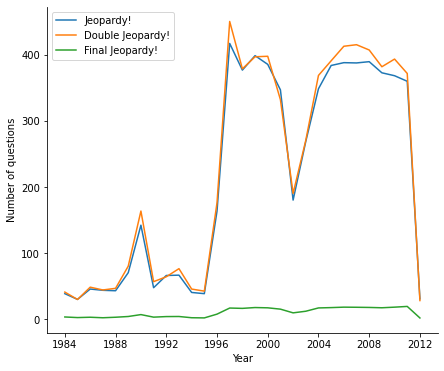

In [61]:
#@title Fig 1. Trend of number of questions for different rounds

df_mean_easy = mean_n_select('Jeopardy!', [])
df_mean_medium = mean_n_select('Double Jeopardy!', [])
df_mean_hard = mean_n_select('Final Jeopardy!', [])
plot_overall_trend([df_mean_easy, df_mean_medium, df_mean_hard], ['Jeopardy!', 'Double Jeopardy!', 'Final Jeopardy!'])

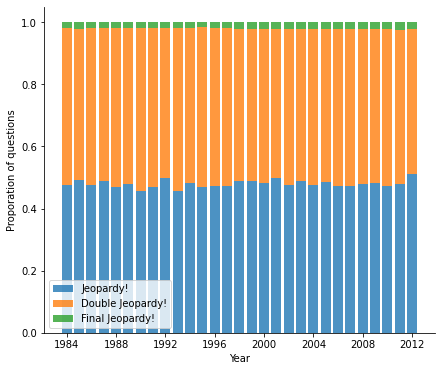

In [62]:
#@title Fig 2. Trend of proporation of questions for different rounds

df_overall_trend = pd.concat(
    [
        pd.concat(topic_trend['Jeopardy!'], axis=1).sum(axis=0).rename('Jeopardy!'), 
        pd.concat(topic_trend['Double Jeopardy!'], axis=1).sum(axis=0).rename('Double Jeopardy!'),
        pd.concat(topic_trend['Final Jeopardy!'], axis=1).sum(axis=0).rename('Final Jeopardy!')
    ], axis=1
)

df_overall_trend_prop = df_overall_trend.div(df_overall_trend.sum(axis=1), axis=0)

plot_stack(df_overall_trend_prop.columns, df_overall_trend_prop)

Before exploring each topics, it would be better to start with the overall trend. As shown in fig 1., the number of questions in the first two figures are significantly higher than the final round which is expected - not all anticipants would get to the final round. We are also interested in the change in the proportion of each round over the years. As shown in the fig 2., the proportion remains stable over time. It is related to the rule of Jeopardy! which determine the proportion.

# 2. Topic change over time

In [63]:
label_name = ['American', 'History', 'Celebrity', 
              'Music', 'Book', 'Sport', 'Society/family',
              'Food',  'Word', 'Politics', 'Animal', 'Movie']

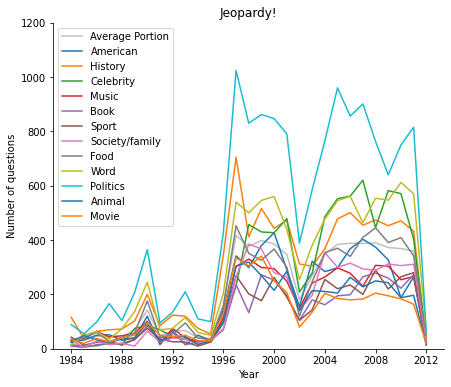

In [69]:
#@title Fig 3. Number of questions in Jeopady! round for selected topics
df_selected_easy = mean_n_select('Jeopardy!', label_name)
plot_topic_trend(df_selected_easy, 'Jeopardy!', label_name, 1200)

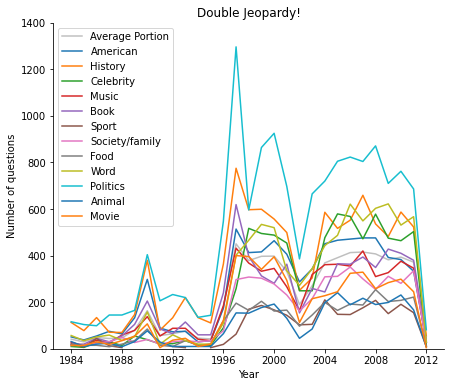

In [71]:
#@title Fig 4. Number of questions in Double Jeopady! round for selected topics

df_selected_medium = mean_n_select('Double Jeopardy!', label_name)

plot_topic_trend(df_selected_medium, 'Double Jeopardy!', label_name, 1400)

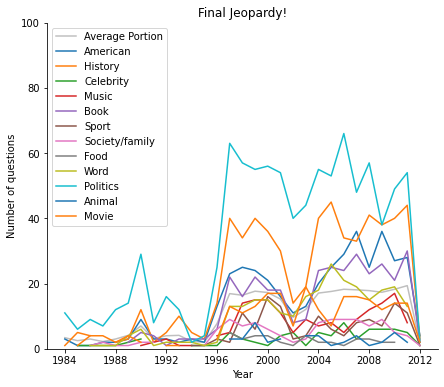

In [73]:
#@title Fig 4. Number of questions in Final Jeopady! round for selected topics

df_selected_hard = mean_n_select('Final Jeopardy!', label_name)

plot_topic_trend(df_selected_hard, 'Final Jeopardy!', label_name, 100)

In this section, we will discuss the number of questions for each topic.

# 3. Top K topics trend

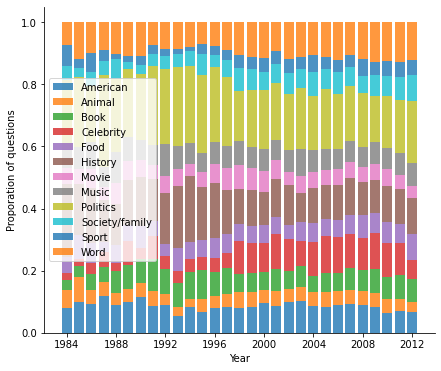

In [65]:
#@title Fig 5. All topics trend over years
df_jeop_stack_count = pd.concat(topic_trend['Jeopardy!'], axis=1).fillna(0)\
                      + pd.concat(topic_trend['Double Jeopardy!'], axis=1).fillna(0)\
                      + pd.concat(topic_trend['Final Jeopardy!'], axis=1).fillna(0)
df_jeop_stack_count_prop = df_jeop_stack_count.div(df_jeop_stack_count.sum(axis=0), axis=1).transpose()
plot_stack(df_jeop_stack_count_prop.columns, df_jeop_stack_count_prop)

The proporation of each topic remains relative stable over time.